# Classification model using KNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_30_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6: # If PFS is over 6 months, I will consider it as Responder (R)
        Y.append(1)
    else:
        Y.append(2) # If PFS is between 3 and 6 months, I will consider it as SemiResponder (SR)
        

data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

print(data.head())
X = data.iloc[:,1:57] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Numero de pacientes: ',len(Y))

   Unnamed: 0   Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0           0  62.0   0.0   0.0                        2.0   
1           1  67.0   0.0   0.0                        2.0   
2           2  62.0   0.0   0.0                        1.0   
3           3  60.0   0.0   0.0                        3.0   
4           4  76.0   0.0   0.0                        2.0   

   Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                              962.0             
1                                              254.0             
2                                              800.0             
3                                              790.0             
4                                             1241.0             

   Tumor_Shrinkage  TM_TC_Ratio  Cohort_CM-009  Cohort_CM-010  ...  \
0       -16.406250     0.766909              0              1  ...   
1       -40.000000     0.773269              0              1  ...   
2       -89.436620  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [5]:
XTrain

,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,TM_TC_Ratio,Cohort_CM-009,Cohort_CM-010,Cohort_CM-025,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
51,56.0,1.0,0.0,1.0,276.0,-18.421053,1.374775,0,0,1,...,21.03524,27.13247,30.62183,26.74041,20.88605,32.10731,21.47750,20.68433,20.99449,33.21668
85,45.0,0.0,0.0,1.0,707.0,0.000000,1.374775,0,0,1,...,21.03524,30.05992,27.09164,32.30108,20.88605,32.26232,28.37079,20.68433,20.99449,32.77138
117,64.0,0.0,0.0,1.0,707.0,-100.000000,0.598882,0,0,1,...,20.77248,24.33081,27.71768,28.72936,21.27932,29.83216,25.50465,21.11484,20.93829,31.89882
25,67.0,0.0,0.0,2.0,651.0,39.080460,7.657631,0,1,0,...,21.18753,23.03429,29.14832,29.85684,21.32743,32.83283,22.22154,21.97440,21.12857,31.62110
170,59.0,0.0,0.0,1.0,42.0,-86.000000,1.374775,1,0,0,...,21.02478,25.01085,28.14718,24.22162,21.32619,30.31995,24.54591,22.38630,20.96902,32.69674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,40.0,0.0,0.0,3.0,915.0,-39.285714,2.220263,0,0,1,...,20.77248,28.37606,29.55227,28.64912,21.27932,30.25043,26.61508,21.11484,20.93829,32.50078
1,67.0,0.0,0.0,2.0,254.0,-40.000000,0.773269,0,1,0,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.97440,21.12857,32.15619
9,72.0,0.0,0.0,3.0,252.0,-80.132450,1.374775,0,1,0,...,21.18753,23.03429,22.85398,27.28295,21.32743,33.65472,22.22154,21.97440,21.12857,32.74438
79,79.0,1.0,0.0,1.0,368.0,0.000000,1.374775,0,0,1,...,20.77248,25.47010,27.53955,20.29074,21.27932,31.93294,17.95302,28.56204,20.93829,32.14871


### 4. Study the best value for K

In [6]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 3 and is: 0.5946


C:\Users\sandr\AppData\Local\Temp/ipykernel_18892/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_18892/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


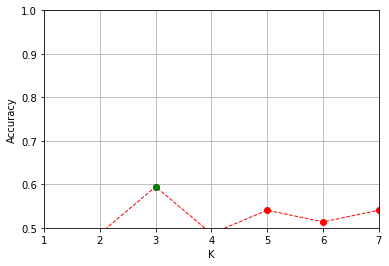

In [7]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [8]:
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x00000195D993C280>,
                     n_neighbors=3)

In [9]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,0,0
1,1,0,0
2,0,0,0
3,2,2,2
4,0,2,2


In [10]:
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))

Best result of the cross validation of the model (euclidean) with the best paramters:0.5832512315270936
Best result of the cross validation of the model (manhattan) with the best paramters:0.5901477832512315


#### 6.1. Manhattan model

In [11]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [12]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [13]:
print('Precisión final en el conjunto de datos de entrenamiento (manhattan): ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de prueba (manhattan): ' + str(contTest/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento (manhattan): 0.7638888888888888
Precisión final en el conjunto de datos de prueba (manhattan): 0.5945945945945946


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[62  2  3]
 [ 5 17  3]
 [14  7 31]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [0 0 2 0 2 2 0 0 2 0 0 0 1 0 2 0 0 0 2 2 0 0 0 2 0 0 1 0 1 0 0 2 2 1 0 1 1
 0 0 1 0 2 0 1 0 0 2 0 1 0 0 0 2 0 0 2 0 1 1 2 0 0 1 0 0 2 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 2 2 2 1 1 0 0 0 0 1 0 1 0 1 0 0 2 2 0 1 1 0 1 0 2 0
 1 0 0 1 0 0 0 2 0 2 0 2 0 0 1 2 1 0 0 2 2 0 0 0 0 0 0 0 2 1 2 0 0]


In [15]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        67
           1       0.65      0.68      0.67        25
           2       0.84      0.60      0.70        52

    accuracy                           0.76       144
   macro avg       0.75      0.73      0.73       144
weighted avg       0.77      0.76      0.76       144



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[13  0  5]
 [ 3  2  1]
 [ 6  0  7]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 0 0 2 2 0 1 2 0 0 0 2 2 0 2 0 0 2 0 0 0 0 1 2 0 2 2 0 2 0 0 2 0 2 0 0 0]


In [17]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65        18
           1       1.00      0.33      0.50         6
           2       0.54      0.54      0.54        13

    accuracy                           0.59        37
   macro avg       0.71      0.53      0.56        37
weighted avg       0.64      0.59      0.59        37

